In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import acquire as a
import prepare as p

#ignore minor warnings
import warnings
warnings.filterwarnings("ignore")


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = a.get_data(query_url = False)
print(df.shape)
df = p.prepare_dataframe(df)
train, validate, test = p.split_data(df)
train.shape, validate.shape, test.shape

Found file in working directory!
(70932, 83)


((53199, 63), (26599, 63), (26600, 63))

# Question 1: Does the artist have any effect on the price of the card.

### Key takeaway

- The amount of cards created is not = to the artist value.

- In the charts artist Jon Avon created the most cards but the artist Christopher Rush created the most expensive card(Black Lotus)

### Discusion

While some artist have created more cards then others, it appears that the amount of cards created is not equal to the value of the cards. 

## Visualization

It looks like the mid '90s, just before '00, and post-'20 might have higher prices



In [3]:
# show only data from the selected columns
df2 = train[['name', 'set_type', 'artist', 'rarity', 'usd']]


In [4]:
# Rarity card count
df2.rarity.value_counts()

common      19320
rare        17089
uncommon    13133
mythic       3471
special       177
bonus           9
Name: rarity, dtype: int64

<AxesSubplot:>

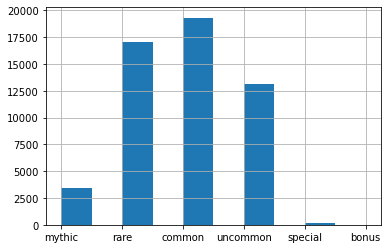

In [5]:
# Count of cards by rarity
df2.rarity.hist()

<AxesSubplot:>

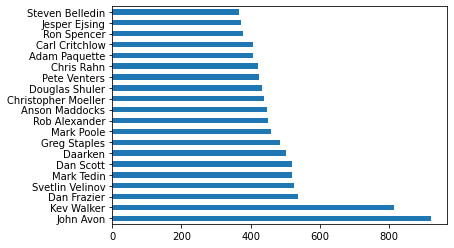

In [6]:
# Top 20 artist who created the most cards
df2['artist'].value_counts()[:20].plot(kind='barh')

In [7]:
# shows only data from top 100 cards grouped by highest value.
df3 = df2.loc[:,'name':'usd'].sort_values(by=['usd'], ascending=False,)[:100]

In [8]:
df3.head()

,name,set_type,artist,rarity,usd
49832,Black Lotus,core,Christopher Rush,rare,11500.00
12737,Ancestral Recall,core,Mark Poole,rare,6999.99
47092,Tropical Island,core,Jesper Myrfors,rare,6000.00
497,Timetwister,core,Mark Tedin,rare,5732.99
9371,Mox Ruby,core,Dan Frazier,rare,5499.99


<AxesSubplot:>

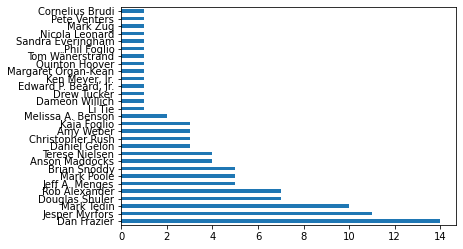

In [9]:
# Plot top 100 cards and artist by amount of cards created
df3['artist'].value_counts().plot(kind='barh')

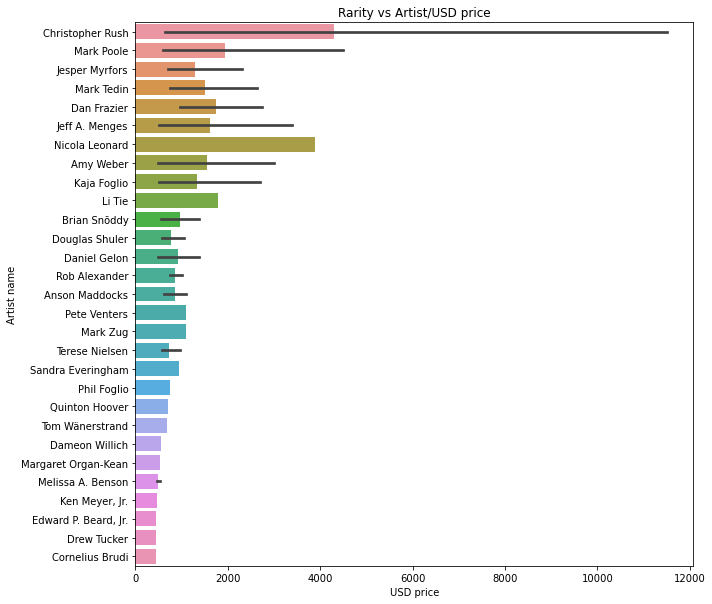

In [10]:
# Bar plor to show Artist and USD price, for top artist
def vis_artist_by_usd(df3):
    plt.figure(figsize=(10,10))
    sns.barplot(data=df3, x='usd', y='artist')
    plt.title('Rarity vs Artist/USD price')
    plt.xlabel('USD price')
    plt.ylabel('Artist name')
    plt.show()

vis_artist_by_usd(df3)



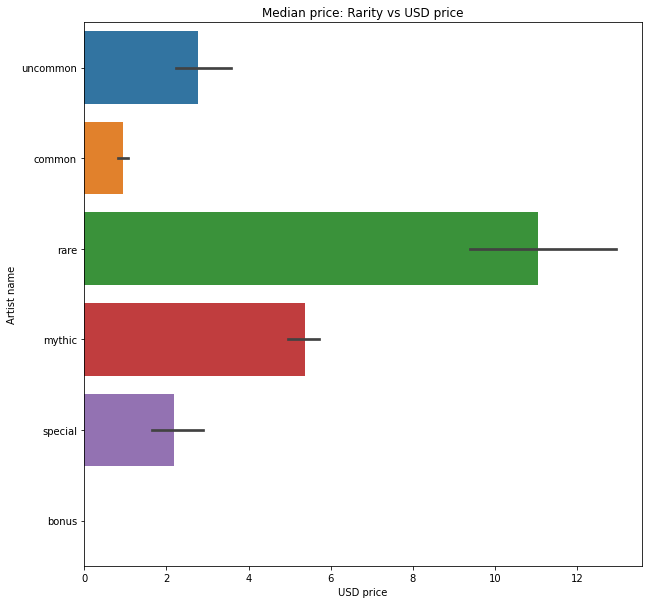

In [11]:
# Median price for all cards based on Rarity and USD price
def vis_rarity_by_usd(df):
    plt.figure(figsize=(10,10))
    sns.barplot(data=df, x='usd', y='rarity')
    plt.title('Median price: Rarity vs USD price')
    plt.xlabel('USD price')
    plt.ylabel('Artist name')
    plt.show()

vis_rarity_by_usd(df)

In [12]:
df.rarity.value_counts()

common      25755
rare        22792
uncommon    17468
mythic       4659
special       248
bonus          10
Name: rarity, dtype: int64

## Hypothesis Testing


H0: The total amount of cards created by artist x is = to the value of cards there cards
 
Ha: The total amount of cards created by artist x is not = to the value of cards there cards
 

In [70]:
def hypothesis_artist_usd(df, alpha = 0.05):
    artist_count = df['artist'].unique().tolist()
    outputs = []
    for artist_name in artist_count:
        usd_sample = df[(df['artist'] == artist_name) & (df.usd > 0.01)]['usd']
        overall_mean = df['usd'].mean()
        t, p = stats.ttest_1samp(usd_sample, overall_mean)
        output = {
            'artist':artist_name,
            'price':usd_sample.max(),
            't_stat':t,
            'p_value':p,
            'reject_null': t > 0 and p/2 < alpha
        }
        outputs.append(output)
    return pd.DataFrame(outputs)

hypothesis_artist_usd(train).sort_values('reject_null', ascending = False)[:20]

,artist,price,t_stat,p_value,reject_null
545,Gao Yan,350.23,1.949354,0.075012,True
137,Drew Tucker,454.40,1.796601,0.076081,True
70,Anson Maddocks,1199.99,3.775458,0.000191,True
891,Matt Jukes,16.74,7.027372,0.002160,True
151,Richard Thomas,219.95,3.571004,0.000517,True
73,Daniel Gelon,1375.00,2.274091,0.024752,True
932,Yuko Shimizu,14.95,5.115735,0.036151,True
1254,Nagano,9.88,43.539146,0.000527,True
549,Wizard of Barge,7.41,5.395219,0.032680,True
42,Dan Frazier,5499.99,3.083049,0.002207,True


In [57]:
train['artist'].value_counts()['Gao Yan']


20

# Question 2: Does the Rarity of the card and artist have any affect on the card price?




## Key takeaway
- The artist and rarity of cards is not = to price
- In the charts only one none rare card is in the high value price range.

## Discusion

Rarity of the card and Artist have no affect on card price. Will need more information in the future to see if higher price cards are more affected by turnament play and age of card.



In [ ]:
## Visualization

Definitely looks like the card type has an effect.

In [ ]:
# Hypothesis 2
- H0: artist and rarity of cards is = to price 
- HA: artist and rarity of cards is not = to price